In [1]:
import h5py
import pandas as pd
import h5py
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
import healpy as hp
import seaborn as sns
import matplotlib.colors as mcolors
sns.set()
sns.set_style("darkgrid", {'grid.linestyle': '--', 'font.serif':'Times New Roman'})
sns.set_context("poster", 1.5, {"lines.linewidth": 2.0})

def rpm_to_period(rpm):
    return 60.0 / rpm

def get_data(path):
    with h5py.File(path, 'r') as f:
        ss_group = f["ss"]
        ss_data = {}
        for key in ss_group.keys():
            ss_data[key] = ss_group[key][()]
        covertime = f['covertime'][()]
        t = f['t'][:]
        coverage = f['coverage'][:]
        return {"ss":ss_data, "t":t, "covertime":covertime, "coverage":coverage}


In [2]:
path = "/group/cmb/litebird/usr/ytakase/scan_optimisation/calibration/sky_coverage/half_sky_cover_time/output/230515_nside128_1Hz_1year"
alpha = np.arange(3, 95-3, 3)
T_alpha = np.logspace(3.2, 7.2, 50)
nside = 128
npix = hp.nside2npix(nside)
T_spin = np.zeros([len(alpha), len(T_alpha)])
T_prec = np.zeros([len(alpha), len(T_alpha)])
Alpha = np.zeros([len(alpha), len(T_alpha)])
Beta = np.zeros([len(alpha), len(T_alpha)])
covertime = np.zeros([len(alpha), len(T_alpha)])

ruck = []
ruck_T = []

k = 1
for i in range(0, len(alpha)):
    for j in range(0, len(T_alpha)):
        p = path + '/output_{}.h5'.format(k)
        if os.path.exists(p) == True:
            #print(p)
            data = get_data(p)
            Alpha[i,j] = data["ss"]["alpha"]
            Beta[i,j] = data["ss"]["beta"]
            T_spin[i,j] = rpm_to_period(data["ss"]["spin_rpm"])
            T_prec[i,j] = rpm_to_period(data["ss"]["prec_rpm"])
            covertime[i,j] = data["covertime"]
            if data["covertime"] == 0:
                covertime[i,j] = np.nan
                ruck.append(k)
                ruck_T.append(T_prec[i,j])
        if k%100 == 0:
            print("k = ", k)
        k += 1

#print(ruck)

k =  100
k =  200
k =  300
k =  400
k =  500
k =  600
k =  700
k =  800
k =  900
k =  1000
k =  1100
k =  1200
k =  1300
k =  1400
k =  1500


In [3]:
cov = covertime


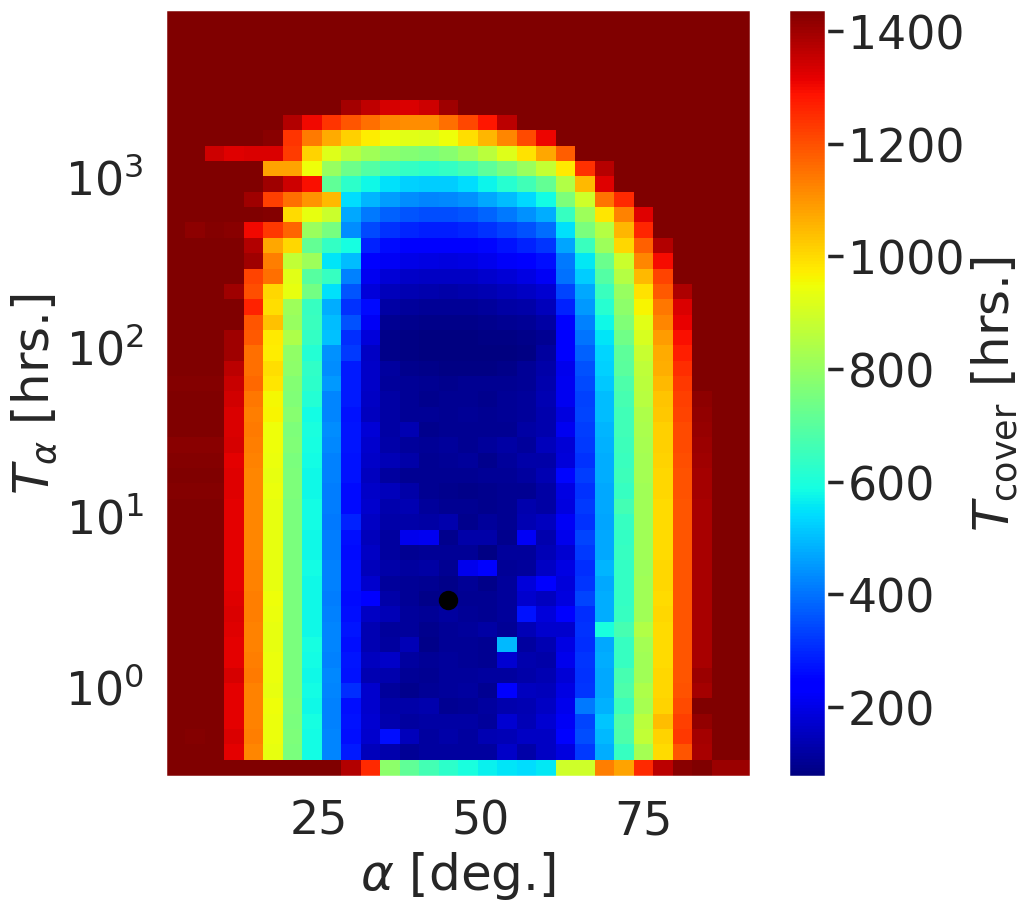

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(11, 10))
#norm = mcolors.LogNorm(vmin=1e6, vmax=1e15)
#cov[cov>60*60*24*20] = np.nan
P = ax.pcolormesh(Alpha, T_prec/60/60, cov/60/60, cmap="jet")
ax.scatter(45, 192.348/60, color="black")
#ax.scatter(45, 90, color="black", marker = "x")
ax.set_xlabel(r"$\alpha$ [deg.]")
ax.set_ylabel(r"$T_{\alpha}$ [hrs.]")
#ax.set_title("HWP = {} rpm, $K$ = {}".format(hwp_config[i], rot_config[i]))
ax.set_yscale("log")
fig.colorbar(P, ax=ax, label=r"$T_{\mathrm{cover}}$ [hrs.]")
plt.tight_layout()
#fig.savefig("./half_sky_cover_time.pdf")

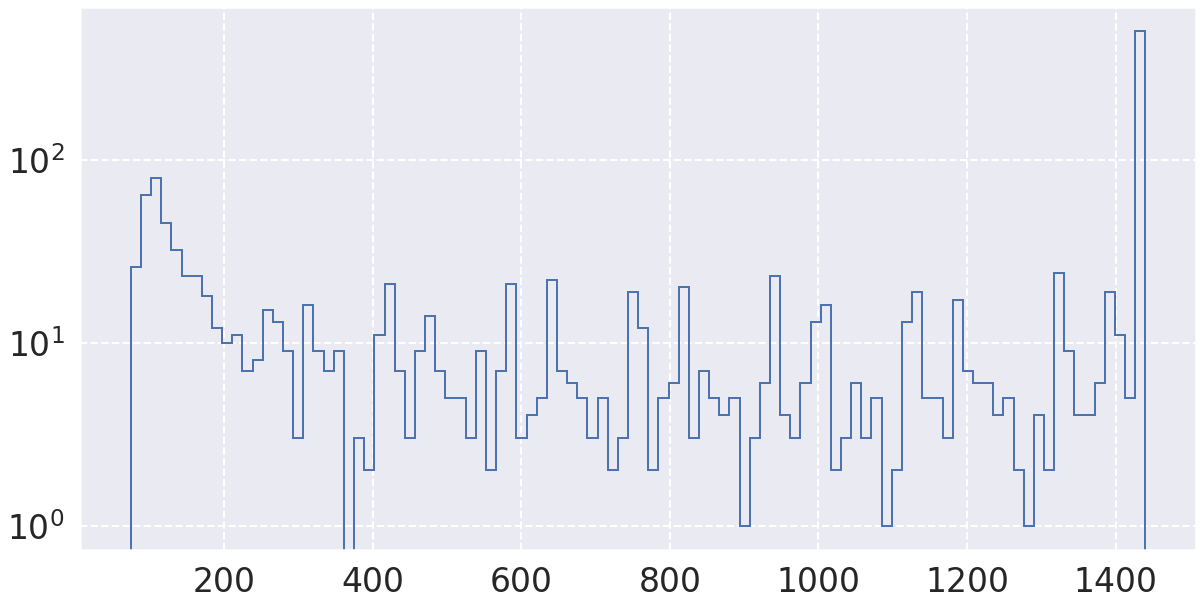

In [6]:
plt.figure(figsize=(20,10))
plt.hist(np.ravel(covertime)/60/60, bins=100, histtype="step");
#plt.xscale("log")
plt.yscale("log")

In [50]:
Alpha[14,:]
covertime[14,:]
T_prec[14,:]/60/60

array([3.28500000e-01, 4.04446672e-01, 4.97951631e-01, 6.13074216e-01,
       7.54812257e-01, 9.29319043e-01, 1.14417045e+00, 1.40869386e+00,
       1.73437304e+00, 2.13534674e+00, 2.62902248e+00, 3.23683224e+00,
       3.98516295e+00, 4.90650196e+00, 6.04084745e+00, 7.43744490e+00,
       9.15692493e+00, 1.12739355e+01, 1.38803827e+01, 1.70894203e+01,
       2.10403628e+01, 2.59047328e+01, 3.18937076e+01, 3.92672874e+01,
       4.83455821e+01, 5.95227087e+01, 7.32839009e+01, 9.02265749e+01,
       1.11086265e+02, 1.36768554e+02, 1.68388392e+02, 2.07318492e+02,
       2.55248932e+02, 3.14260521e+02, 3.86915135e+02, 4.76366937e+02,
       5.86499308e+02, 7.22093434e+02, 8.89035880e+02, 1.09457413e+03,
       1.34763125e+03, 1.65919323e+03, 2.04278593e+03, 2.51506232e+03,
       3.09652538e+03, 3.81241822e+03, 4.69381997e+03, 5.77899503e+03,
       7.11505422e+03, 8.76000000e+03])

Text(0, 0.5, 'Half-sky cover time [hrs.]')

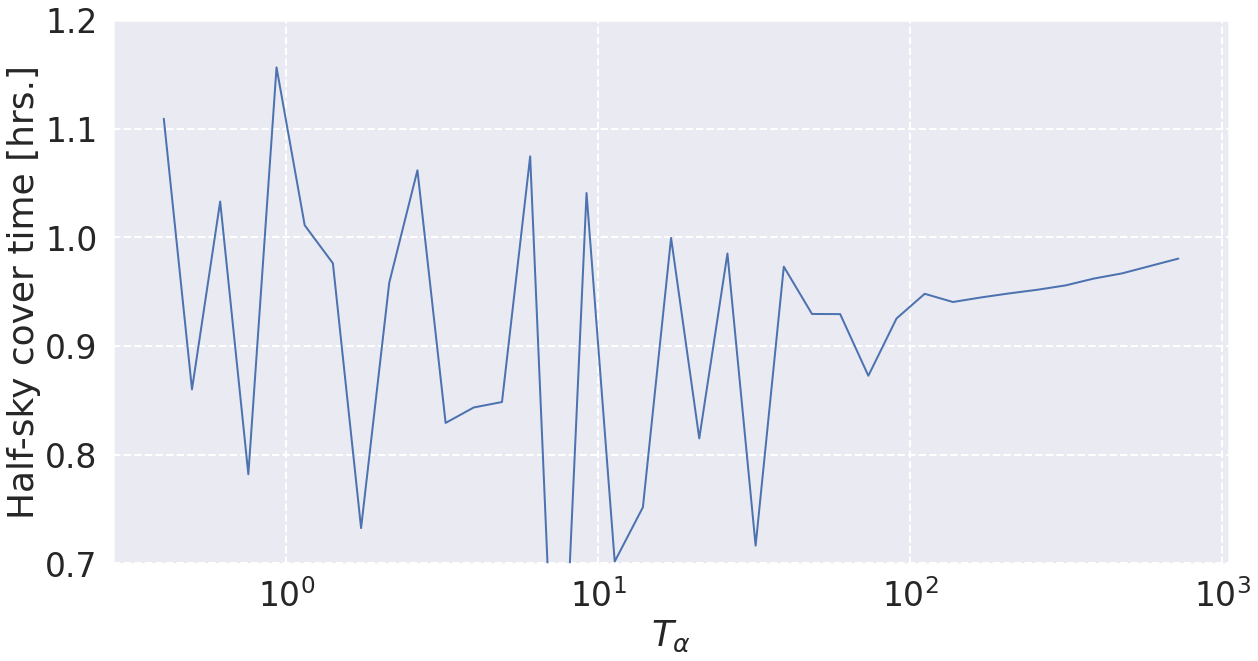

In [56]:
plt.figure(figsize=(20,10))
plt.plot(T_prec[14,:]/60/60, covertime[14,:]/covertime[12,:], "-")
plt.ylim(0.7, 1.2)

plt.xscale("log")
plt.xlabel(r"$T_\alpha$")
plt.ylabel(r"Half-sky cover time [hrs.]")